<a href="https://colab.research.google.com/github/bakkso/Kaggle-basic/blob/main/my_titanic_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Embarked has 2 Null values
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
Initial        0
Age_cat        0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
Initial        0
Age_cat        0
dtype: int64
총 268명 중 83.21%  정확도로 생존 맞춤


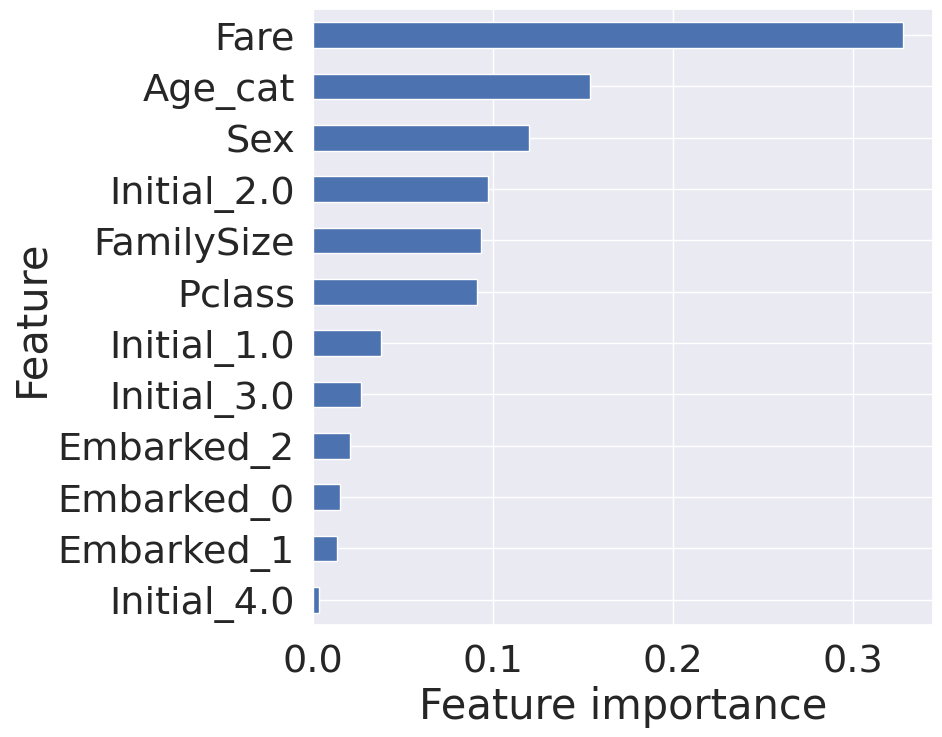

In [24]:
## 기본적으로 이유한님 코드
## 내가 추가한 코드는 '##'을 붙혀 구분
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive ## 코랩에서 작성했기때문에 구글드라이브 이용
drive.mount('/content/drive')

plt.style.use('seaborn') ## 이유한님이 자주 쓰시는 방법
sns.set(font_scale=2.5) # 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

df_train = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/Kaggle/titanic/Data/train.csv')
df_test = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/Kaggle/titanic/Data/test.csv')

df_train.head()

df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

df_test.loc[df_test.Fare.isnull(),'Fare'] = df_test['Fare'].mean()
df_train['Initial'] = 0

for i in df_train:
    df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
for i in df_test:
    df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap = 'summer_r')

df_train['Initial'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Master','Mlle','Mme','Ms','Rev','Sir'],
                            ['Mr','Mr','Mrs','Mr','Mr','Other','Miss','Other','Mr','Miss','Miss','Mrs','Other','Mr'],inplace = True)

df_test['Initial'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Master','Mlle','Mme','Ms','Rev','Sir'],
                            ['Mr','Mr','Mrs','Mr','Mr','Other','Miss','Other','Mr','Miss','Miss','Mrs','Other','Mr'],inplace = True)
df_all = pd.concat([df_train,df_test])

df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 37
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 45

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 37
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 45

print('Embarked has', sum(df_train['Embarked'].isnull()), 'Null values')

df_train['Embarked'].fillna('S',inplace=True)

df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0

df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

## scikit-learn의 Random Forest 구현은 누락된 값을 허용하지 않기 때문에 이러한 값을 채우거나 삭제해야함
## 'Cabin'과 'Age_cat'에서 결측값 발견 -> NaN값 처리
## 'Cabin' 열 삭제하기
df_train.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

## 'Age_cat'의 NaN 값을 중간값으로 대체하기
age_cat_median = df_train['Age_cat'].median()
df_train['Age_cat'].fillna(age_cat_median, inplace=True)
df_test['Age_cat'].fillna(age_cat_median, inplace=True)

## 잘 처리되었는지 확인
print(df_train.isnull().sum())
print(df_test.isnull().sum())


def category_age(x):
    if x < 10:
      return 0
    elif x < 20:
      return 1
    elif x < 30:
      return 2
    elif x < 40:
      return 3
    elif x < 50:
      return 4
    elif x < 60:
      return 5
    elif x < 70:
      return 6
    else:
      return 7

df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

df_train.drop(['Age', 'Age_cat_2'],axis = 1, inplace=True)
df_test.drop(['Age'],axis = 1, inplace=True)

df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})

df_train = pd.get_dummies(df_train, columns = ['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns = ['Initial'], prefix='Initial')

df_train = pd.get_dummies(df_train, columns = ['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns = ['Embarked'], prefix='Embarked')

## 위에서 'Cabin'을 삭제했음
#df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
#df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

## 정확도 82.46% -> 83.21%
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket'], axis=1, inplace=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train = df_train.drop('Survived', axis = 1).values
target_label = df_train['Survived'].values
X_test = df_test.values

df_train.shape

X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label ,test_size = 0.3, random_state=2018)

X_tr.shape

model = RandomForestClassifier()
model.fit(X_tr, y_tr)

prediction = model.predict(X_vld)

print('총 {}명 중 {:.2f}%  정확도로 생존 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

df_train.head()

model.feature_importances_

df_train.head()

from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance,index = df_test.columns)

Series_feat_imp.sort_values

plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

submission = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/Kaggle/titanic/Data/gender_submission.csv')

submission.head()

prediction = model.predict(X_test)

submission['Survived'] = prediction

#submission.to_csv('',index = False)
